In [9]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 10 

base_dir = '../data/chest_xray/'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')



In [10]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='binary',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    label_mode='binary',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False
)

normalization_layer = layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

print("Datasets loaded and normalized.")


Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Datasets loaded and normalized.


In [11]:
model = models.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

print("Model architecture created.")


Model architecture created.


In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']  
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
print("Starting model training...")

history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=validation_dataset
)

print("Training finished!")


Starting model training...
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.7561 - loss: 1.0143 - val_accuracy: 0.6875 - val_loss: 0.5445
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9066 - loss: 0.2727 - val_accuracy: 0.8125 - val_loss: 0.3692
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9429 - loss: 0.1850 - val_accuracy: 0.8125 - val_loss: 0.4613
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9551 - loss: 0.1431 - val_accuracy: 1.0000 - val_loss: 0.0908
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9628 - loss: 0.1198 - val_accuracy: 0.8750 - val_loss: 0.2063
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.9693 - loss: 0.1010 - val_accuracy: 0.8750 - val_loss: 0.1578
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.9734 - loss: 0.0877 - val_accuracy: 0.9375 - val_loss: 0.0594
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accurac

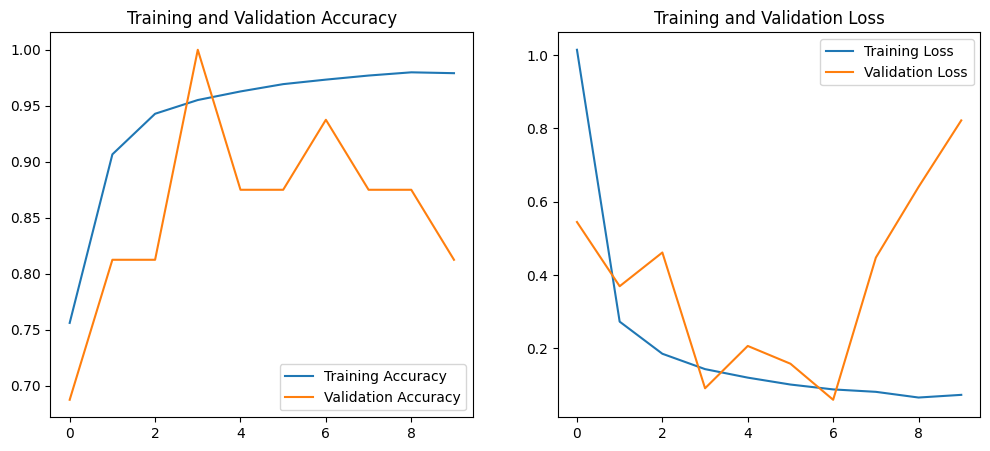

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
